In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
train  = pd.read_csv(r'C:\Users\student\Desktop\train_sem12.csv')

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
stores = pd.read_csv("https://raw.githubusercontent.com/iad34/seminars/master/materials/store_sem12.csv")

In [6]:
stores.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
train.shape

(1017209, 9)

In [7]:
stores.shape

(1115, 10)

In [5]:
data = pd.merge(train, stores)

In [9]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [8]:
data.shape

(1017209, 18)

In [6]:
# train test split
idxs = np.random.permutation(np.arange(data.shape[0]))
train_idxs = idxs[:len(idxs)//2]
test_idxs = idxs[len(idxs)//2:]

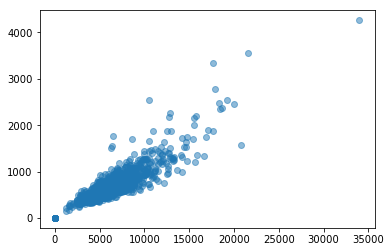

In [7]:
plt.scatter(train['Sales'][::1000], train['Customers'][::1000], alpha=0.5)

In [8]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=2)
z = pca.fit_transform(train[['Sales', 'Customers']])

In [25]:
vector = pca.components_[0]

In [24]:
pca.components_

array([[ 0.9941932 ,  0.10760989],
       [-0.10760989,  0.9941932 ]])

(-5105.6598166479698,
 36196.331144064541,
 -1559.2389102588554,
 31320.321368051584)

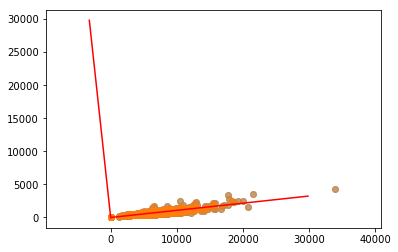

In [26]:
# 1d
plt.scatter(train['Sales'][::1000], train['Customers'][::1000], alpha=0.5)
plt.plot([0, vector[0]*30000], [0, vector[1]*30000], color='r')
vector = pca.components_[1]
plt.scatter(train['Sales'][::1000], train['Customers'][::1000], alpha=0.5)
plt.plot([0, vector[0]*30000], [0, vector[1]*30000], color='r')
plt.axis('equal')

In [ ]:
# po perpend k PCA - minimalmnaya dispersia

In [40]:
# первое решение - саааамое простое: оставим только понятные числовые столбцы без нанов
######## Задача 1
data_simple = data[['DayOfWeek', 'Open', 'SchoolHoliday', 'CompetitionDistance',
                  'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']].fillna(0)

In [30]:
from sklearn.linear_model import LinearRegression

In [41]:
clf = LinearRegression()
clf.fit(data_simple.ix[train_idxs], data["Sales"][train_idxs])
pred = clf.predict(data_simple.ix[test_idxs])

In [38]:
def rmspe(target, predicted):
    mask = target != 0
    return np.sqrt((((target-predicted)/target)**2)[mask].mean())

In [43]:
rmspe(data["Sales"][test_idxs], pred)

0.58079976651758669

In [44]:
pca = PCA(2)
comps = pca.fit_transform(data_simple)

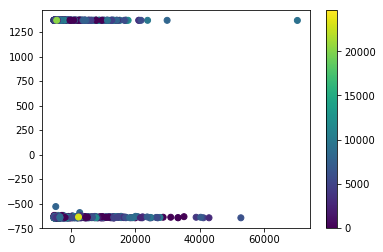

In [48]:
plt.scatter(comps[::1000, 0], comps[::1000, 1], c=data['Sales'][::1000])
plt.colorbar()

In [49]:
from sklearn.manifold import TSNE

In [50]:
tsne = TSNE()
comps = tsne.fit_transform(data_simple.ix[::1000])

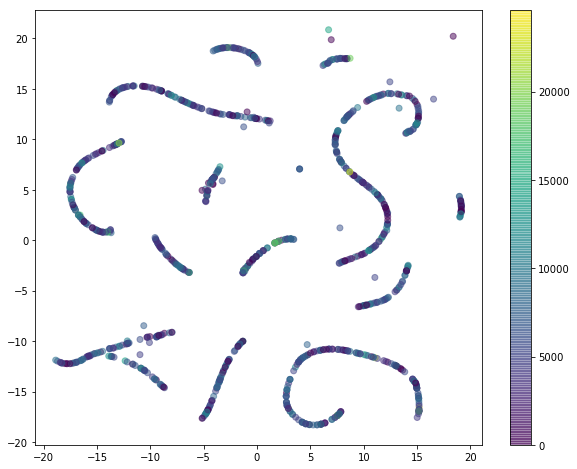

In [54]:
plt.figure(figsize=(10, 8))
plt.scatter(comps[:, 0], comps[:, 1], c=data['Sales'][::1000], alpha=0.5)
plt.colorbar()

In [60]:
data_che = pd.get_dummies(data[data.columns[1:2].tolist()+data.columns[3:-3].tolist()],
                               columns=['DayOfWeek', 'StoreType', 'Assortment', 'StateHoliday']).drop(['Sales', 'Customers'], axis=1).fillna(0)

In [61]:
clf = LinearRegression()
clf.fit(data_che.ix[train_idxs], data["Sales"][train_idxs])
pred = clf.predict(data_che.ix[test_idxs])

In [62]:
rmspe(data["Sales"][test_idxs], pred)

0.50626570704304286